In [1]:
import networkx as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
poll_blog = np.read_gml("polblogs.gml")

In [9]:
#Creating weighted graph
G=np.Graph()
for u,v,data in poll_blog.edges_iter(data=True):
    if G.has_edge(u,v):
        G[u][v]['weight'] += 1
    else:
        G.add_edge(u,v,weight=1)

<b> Create a nice looking graph of the political blog network <b>

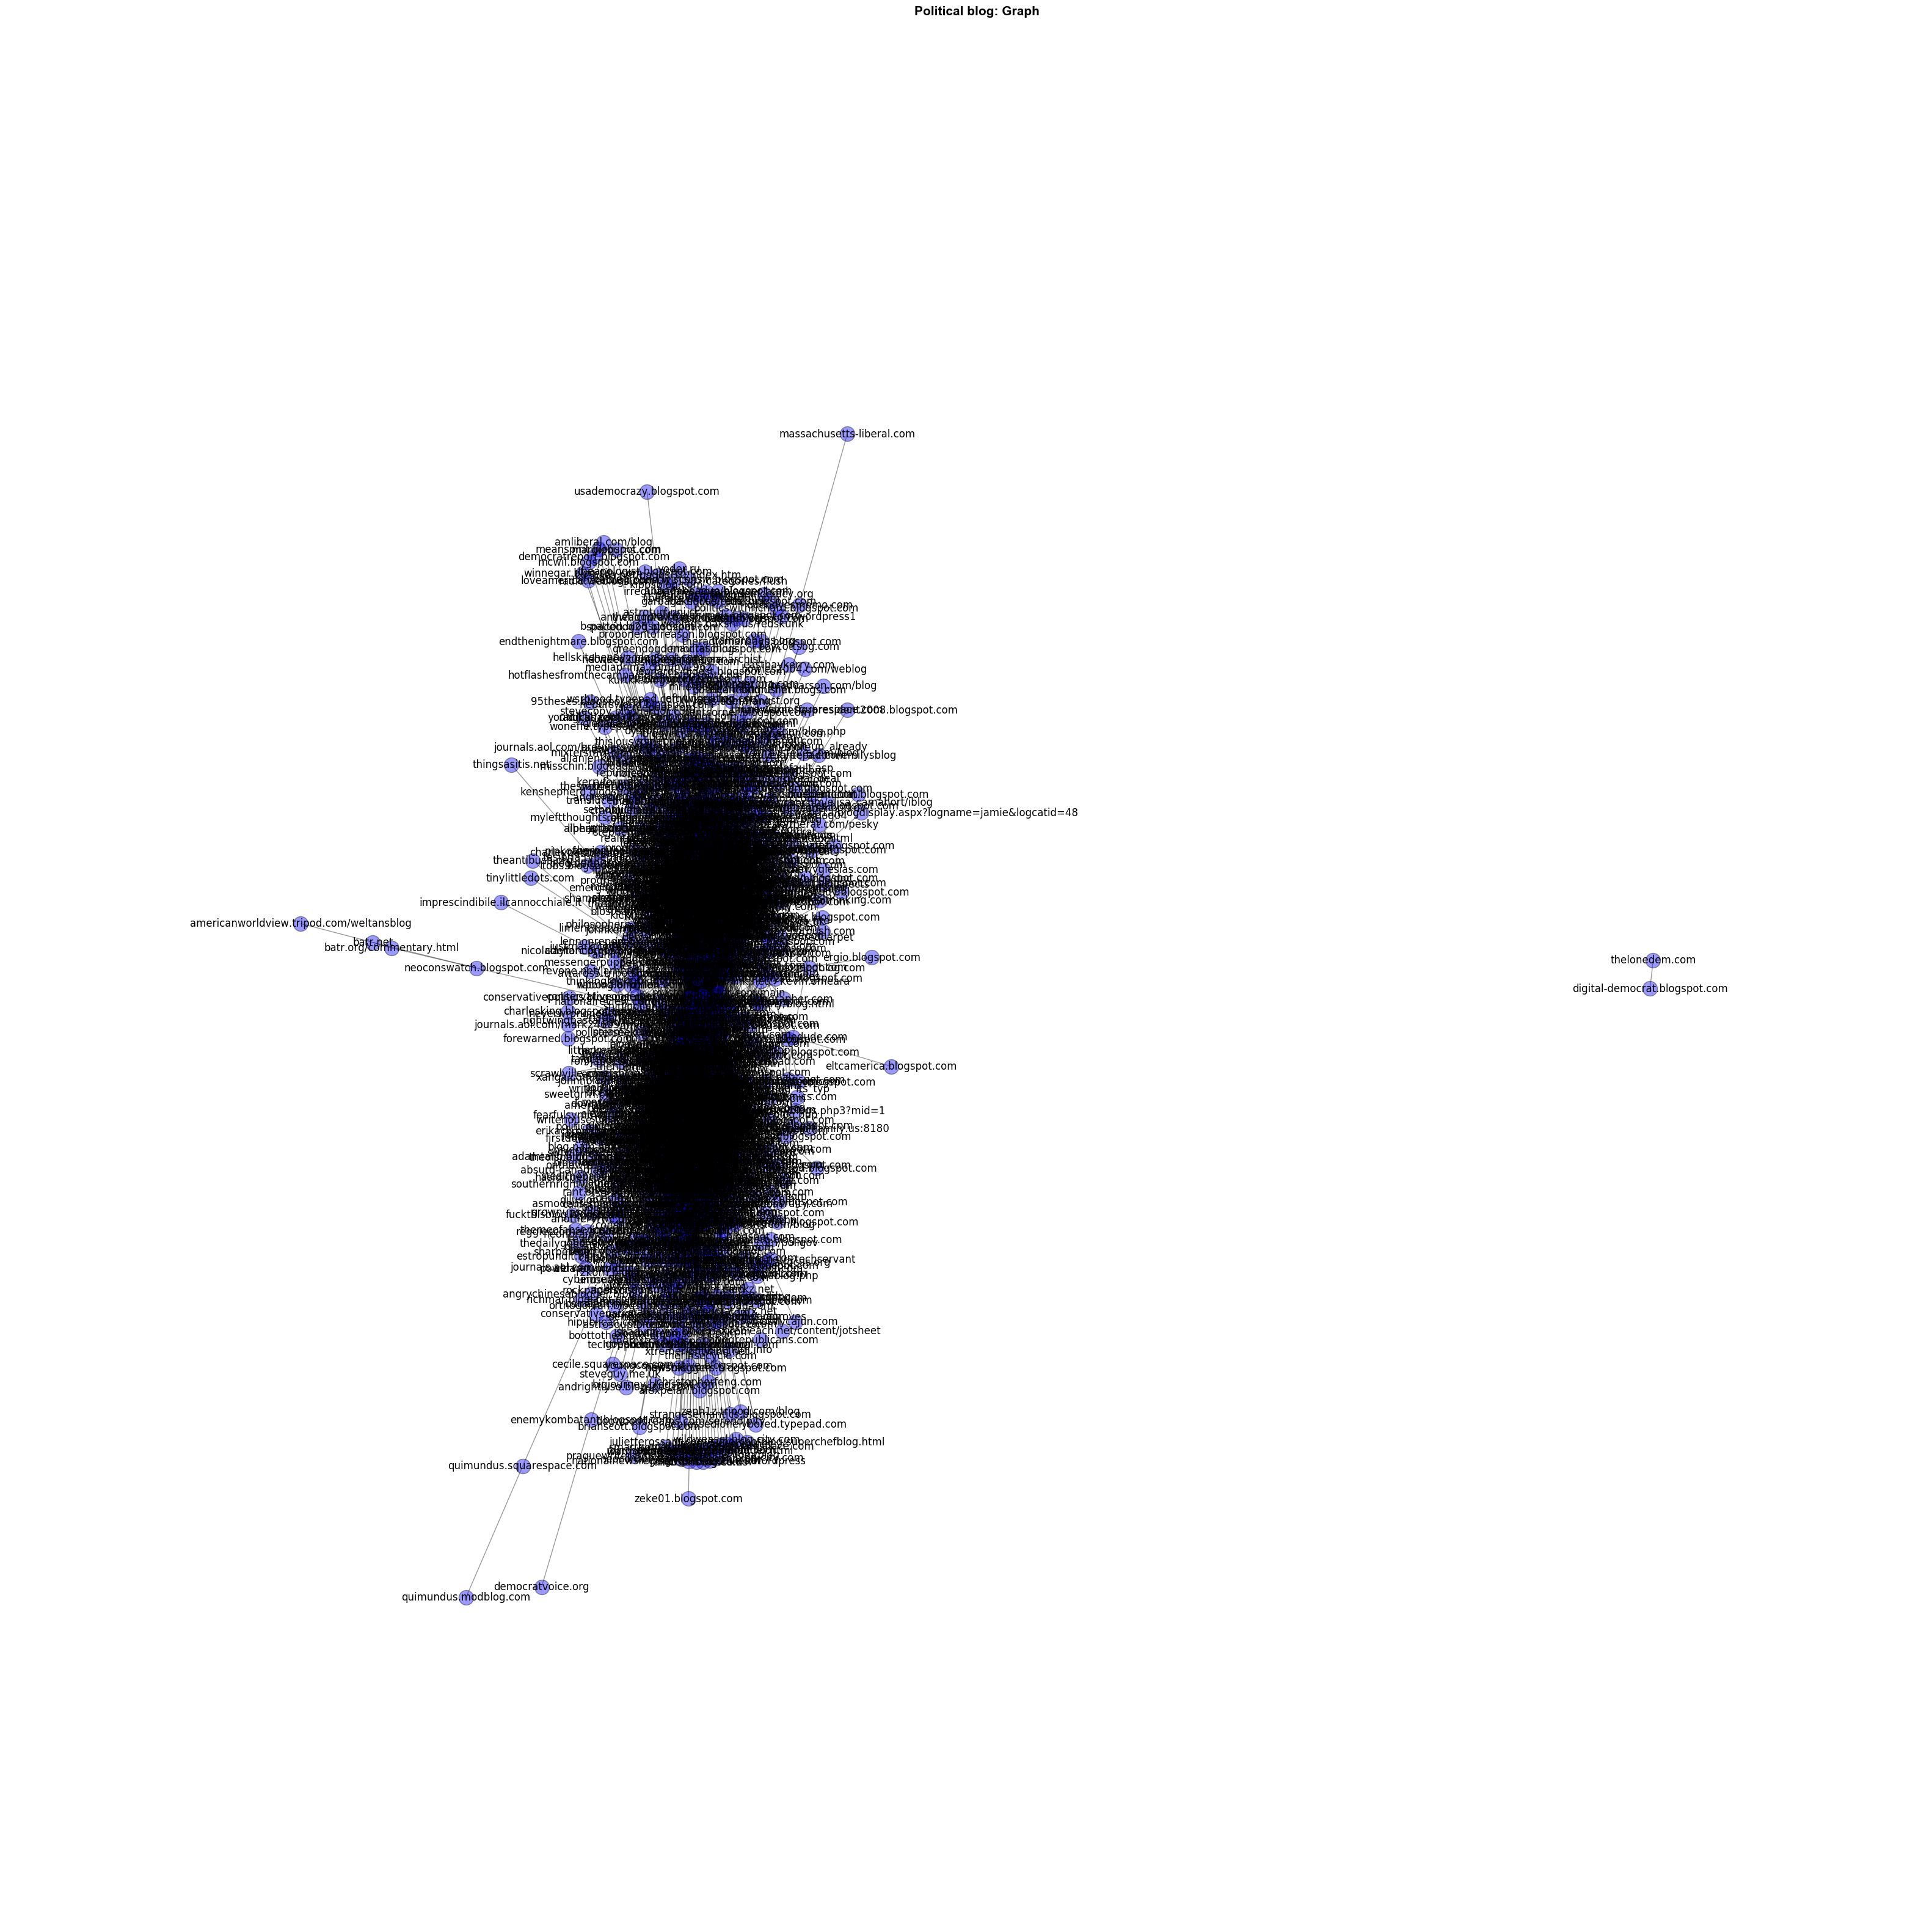

In [12]:
plt.figure(figsize=(40,40))
pos = np.spring_layout(G, iterations=500, scale=5, k=.3)
np.draw_networkx_labels(G,pos,fontsize=10)
font={'fontname' : 'Arial',
       'color' : 'k',
       'fontweight': 'bold',
       'fontsize' : '15'}
plt.title("Political blog: Graph", font)

np.draw_networkx_nodes(G,pos,node_color='b', alpha=0.4)
np.draw_networkx_edges(G,pos,alpha=0.4,node_size=0, width=01, edge_color='k')
plt.axis('off')
plt.show()

In [13]:
centrality = np.eigenvector_centrality(G)

In [14]:
lists = []
for node in centrality:
    lists.append((node, centrality[node]))
sorted_lists = lists.sort(key=lambda x: x[1])

<b> What are the 10 least influential blogs? <b>

In [15]:
least_influential = sorted(lists, key=lambda x: x[1], reverse=False)
least_influential[0:10]

[(u'thelonedem.com', 1.776325109755965e-72),
 (u'digital-democrat.blogspot.com', 1.776325109755965e-72),
 (u'americanworldview.tripod.com/weltansblog', 7.491540638916242e-09),
 (u'quimundus.modblog.com', 6.682929975006484e-08),
 (u'batr.org/commentary.html', 6.795517611554005e-07),
 (u'batr.net', 6.796325594929459e-07),
 (u'democratvoice.org', 1.0233388204113296e-06),
 (u'quimundus.squarespace.com', 6.061741218869531e-06),
 (u'massachusetts-liberal.com', 9.483365235734505e-06),
 (u'thingsasitis.net', 1.1736249650658606e-05)]

<b>What are the 10 most influential blogs?<b>

In [16]:
most_influential = sorted(lists, key=lambda x: x[1], reverse=True)
most_influential[0:10]

[(u'atrios.blogspot.com', 0.1948079793663771),
 (u'dailykos.com', 0.1608974020523483),
 (u'washingtonmonthly.com', 0.14653924259836879),
 (u'digbysblog.blogspot.com', 0.14264369221718307),
 (u'bodyandsoul.typepad.com', 0.14113489174330363),
 (u'liberaloasis.com', 0.1395237157110787),
 (u'tbogg.blogspot.com', 0.13703641699824257),
 (u'corrente.blogspot.com', 0.12941759274096148),
 (u'talkingpointsmemo.com', 0.12700519780790956),
 (u'dneiwert.blogspot.com', 0.12237564692546016)]